In [1]:
import pandas as pd

# Concat Data

In [2]:
df1 = pd.read_csv(r'C:\Users\11654\Desktop\Cedric\2ndSem\Big_Data\Project\accidents_2005_to_2007.csv',low_memory=False)
df1.shape

(570011, 33)

In [3]:
df2 = pd.read_csv(r'C:\Users\11654\Desktop\Cedric\2ndSem\Big_Data\Project\accidents_2009_to_2011.csv',low_memory=False)
df2.shape

(469442, 33)

In [4]:
df3 = pd.read_csv(r'C:\Users\11654\Desktop\Cedric\2ndSem\Big_Data\Project\accidents_2012_to_2014.csv',low_memory=False)
df3.shape

(464697, 33)

In [5]:
# combine 3 datasets
df = pd.concat([df1,df2,df3])
df.shape

(1504150, 33)

In [6]:
df['Time'].describe()

count     1504033
unique       1439
top         17:00
freq        14765
Name: Time, dtype: object

In [7]:
# drop Accident_Index, Date, Local_Authority_(Highway),Junction_Detail,
# LSOA_of_Accident_Location, Year, Location_Easting_OSGR, Location_Northing_OSGR
df = df.drop(columns=['Accident_Index', 'Date', 'Local_Authority_(Highway)','Junction_Detail',
                                 'LSOA_of_Accident_Location', 'Year', 'Location_Easting_OSGR', 'Location_Northing_OSGR'])
df.shape

(1504150, 25)

# Deal with null values (filled with most-frequent or mean value)

In [8]:
# check number of null values
df.isnull().sum(axis = 0)

Longitude                                         101
Latitude                                          101
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Day_of_Week                                         0
Time                                              117
Local_Authority_(District)                          0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                         0
Junction_Control                               602835
2nd_Road_Class                                      0
2nd_Road_Number                                     0
Pedestrian_Crossing-Human_Control                  17
Pedestrian_Crossing-Physical_Facilities            34
Light_Conditions            

In [9]:
# Filled with 'Giveway or uncontrolled' (highest frequency) for Junction control
df['Junction_Control'] = df['Junction_Control'].fillna(df['Junction_Control'].describe()[2])

In [10]:
# Filled with '-1.4366249705129326' (mean value) for Longtitude
df['Longitude'] = df['Longitude'].fillna(df['Longitude'].describe()[1])

In [11]:
# Filled with '52.58939945988537' (mean value) for Latitude
df['Latitude'] = df['Latitude'].fillna(df['Latitude'].describe()[1])

In [12]:
# Filled with 'None within 50 metres' (highest frequency) for Pedestrian_Crossing-Human_Control
df['Pedestrian_Crossing-Human_Control'] = df['Pedestrian_Crossing-Human_Control'].fillna(df['Pedestrian_Crossing-Human_Control'].describe()[2])

In [13]:
# Filled with 'No physical crossing within 50 meters' (highest frequency) for Pedestrian_Crossing-Physical_Facilities
df['Pedestrian_Crossing-Physical_Facilities'] = df['Pedestrian_Crossing-Physical_Facilities'].fillna(df['Pedestrian_Crossing-Physical_Facilities'].describe()[2])

In [14]:
# filled with 'Fine without high winds'
df['Weather_Conditions'] = df['Weather_Conditions'].fillna(df['Weather_Conditions'].describe()[2])

In [15]:
# filled with 'dry'
df['Road_Surface_Conditions'] = df['Road_Surface_Conditions'].fillna(df['Road_Surface_Conditions'].describe()[2])

In [16]:
# filled with 'None'
df['Special_Conditions_at_Site'] = df['Special_Conditions_at_Site'].fillna(df['Special_Conditions_at_Site'].describe()[2])

In [17]:
# filled with 'None'
df['Carriageway_Hazards'] = df['Carriageway_Hazards'].fillna(df['Carriageway_Hazards'].describe()[2])

In [18]:
# filled with 'None'
df['Did_Police_Officer_Attend_Scene_of_Accident'] = df['Did_Police_Officer_Attend_Scene_of_Accident'].fillna(df['Did_Police_Officer_Attend_Scene_of_Accident'].describe()[2])

In [19]:
# Filled with 17:00
df['Time'] = df['Time'].fillna(df['Time'].describe()[2])

In [20]:
# re-check number of null values
df.isnull().sum(axis = 0)

Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Control                               0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-Physical_Facilities        0
Light_Conditions                               0
Weather_Conditions                             0
Road_Surface_Conditi

# Change data format

In [21]:
# change column "Did_Police_Officer_Attend_Scene_of_Accident" to dummy 1/0
Police_Attend_Scene_of_Accident = []
for i in df['Did_Police_Officer_Attend_Scene_of_Accident']:
    if i == 'Yes':
        Police_Attend_Scene_of_Accident.append(1)
    else:
        Police_Attend_Scene_of_Accident.append(0)
# create new column
df['Police_Attend_Scene_of_Accident'] = Police_Attend_Scene_of_Accident
# drop original column
df = df.drop(columns=['Did_Police_Officer_Attend_Scene_of_Accident'])

In [23]:
# change time to day(1) or night (0) dummy
hour = []
for i in df['Time']:
    hour.append(i.split(':')[0])
for i in hour:
    i = int(i)

time = []
for i in hour:
    if (int(i)>5) and (int(i)<18):
        time.append(1)
    else:
        time.append(0)
# create new column
df['Time'] = time

# Deal with data imbalance (?)

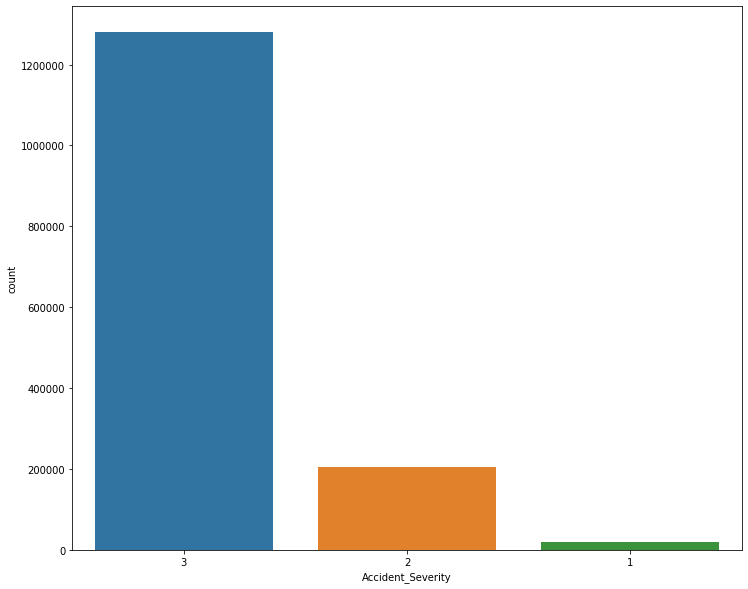

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(12,10))
sns.countplot(x='Accident_Severity', data=df, order=df['Accident_Severity'].value_counts().index)
# extremely imbalanced data

In [25]:
# check specific number
df_summary = df.groupby('Accident_Severity').count()
df_summary['Labels'] = df_summary['Longitude']
print(df_summary['Labels'])

Accident_Severity
1      19441
2     204504
3    1280205
Name: Labels, dtype: int64


In [26]:
# get sum of count as base number
base = 0
for i in df_summary['Labels']:
    base = base + i
base

1504150

In [27]:
# calculate ratio
ratio_1 = (df_summary['Labels'][1]/base)
ratio_2 = (df_summary['Labels'][2]/base)
ratio_3 = (df_summary['Labels'][3]/base)

In [28]:
# add weight column by using "inverse ratio"
weight = []
for i in df['Accident_Severity']:
    if i == 1:
        weight.append(ratio_3)
    elif i == 2:
        weight.append(ratio_2)
    else:
        weight.append(ratio_1)
# create new column weight
df['weight'] = weight
df.head()

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),1st_Road_Class,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Police_Attend_Scene_of_Accident,weight
0,-0.191170,51.489096,1,2,1,1,3,1,12,3,...,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,1,0.135960
1,-0.211708,51.520075,1,3,1,1,4,1,12,4,...,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,1,0.012925
2,-0.206458,51.525301,1,3,2,1,5,0,12,5,...,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,1,0.012925
3,-0.173862,51.482442,1,3,1,1,6,1,12,3,...,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,1,0.012925
4,-0.156618,51.495752,1,3,1,1,2,0,12,6,...,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,1,0.012925


# set up data for classification and location 

In [29]:
# make the location df
column_names = ["Longitude", "Latitude"]
location = pd.DataFrame(columns = column_names)
location["Longitude"] = df['Longitude']
location["Latitude"] = df["Latitude"]
location.head()

,Longitude,Latitude
0,-0.191170,51.489096
1,-0.211708,51.520075
2,-0.206458,51.525301
3,-0.173862,51.482442
4,-0.156618,51.495752


In [30]:
# make the classification df
classification = df.drop(columns=["Longitude", "Latitude"])
classification.head()

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Police_Attend_Scene_of_Accident,weight
0,1,2,1,1,3,1,12,3,3218,Single carriageway,...,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,1,0.135960
1,1,3,1,1,4,1,12,4,450,Dual carriageway,...,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,1,0.012925
2,1,3,2,1,5,0,12,5,0,Single carriageway,...,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,1,0.012925
3,1,3,1,1,6,1,12,3,3220,Single carriageway,...,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,1,0.012925
4,1,3,1,1,2,0,12,6,0,Single carriageway,...,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,1,0.012925


# Transform categorical data

In [31]:
classification.dtypes

Police_Force                                 int64
Accident_Severity                            int64
Number_of_Vehicles                           int64
Number_of_Casualties                         int64
Day_of_Week                                  int64
Time                                         int64
Local_Authority_(District)                   int64
1st_Road_Class                               int64
1st_Road_Number                              int64
Road_Type                                   object
Speed_limit                                  int64
Junction_Control                            object
2nd_Road_Class                               int64
2nd_Road_Number                              int64
Pedestrian_Crossing-Human_Control           object
Pedestrian_Crossing-Physical_Facilities     object
Light_Conditions                            object
Weather_Conditions                          object
Road_Surface_Conditions                     object
Special_Conditions_at_Site     

In [32]:
l = []
for i in classification['Road_Type']:
    if i == 'Single carriageway':
        l.append(1)
    elif i =='Dual carriageway':
        l.append(2)
    elif i =='One way street':
        l.append(3)
    elif i =='Roundabout':
        l.append(4)
    elif i =='Slip road':
        l.append(5)
    else:
        l.append(6)
classification['Road_Type'] = l

In [33]:
l = []
for i in classification['Junction_Control']:
    if i == 'Giveway or uncontrolled':
        l.append(1)
    elif i =='Automatic traffic signal':
        l.append(2)
    elif i =='Stop Sign':
        l.append(3)
    elif i =='Authorised person':
        l.append(4)
classification['Junction_Control'] = l

In [34]:
l = []
for i in classification['Pedestrian_Crossing-Human_Control']:
    if i == 'None within 50 metres':
        l.append(1)
    elif i =='Control by other authorised person':
        l.append(2)
    else:
        l.append(3)
classification['Pedestrian_Crossing-Human_Control'] = l

In [35]:
l = []
for i in classification['Pedestrian_Crossing-Physical_Facilities']:
    if i == 'Zebra crossing':
        l.append(1)
    elif i == 'Pedestrian phase at traffic signal junction':
        l.append(2)
    elif i == 'No physical crossing within 50 meters':
        l.append(3)
    elif i == 'Central refuge':
        l.append(4)
    elif i == 'non-junction pedestrian crossing':
        l.append(5)
    else:
        l.append(6)
classification['Pedestrian_Crossing-Physical_Facilities'] = l

In [36]:
l = []
for i in classification['Light_Conditions']:
    if i == 'Daylight: Street light present':
        l.append(1)
    elif i == 'Darkness: Street lights present and lit':
        l.append(2)
    elif i == 'Darkness: Street lighting unknown':
        l.append(3)
    elif i =='Darkness: Street lights present but unlit':
        l.append(4)
    else:
        l.append(5)
classification['Light_Conditions'] = l

In [37]:
l = []
for i in classification['Weather_Conditions']:
    if i == 'Raining without high winds':
        l.append(1)
    elif i =='Fine without high winds':
        l.append(2)
    elif i =='Unknown':
        l.append(3)
    elif i =='Snowing without high winds':
        l.append(4)
    elif i =='Other':
        l.append(5)
    elif i =='Fine with high winds':
        l.append(6)
    elif i =='Raining with high winds':
        l.append(7)
    elif i =='Fog or mist':
        l.append(8)
    else:
        l.append(9)
classification['Weather_Conditions'] = l

In [38]:
l = []
for i in classification['Road_Surface_Conditions']:
    if i == 'Wet/Damp':
        l.append(1)
    elif i =='Dry':
        l.append(2)
    elif i =='Frost/Ice':
        l.append(3)
    elif i =='Snow':
        l.append(4)
    else:
        l.append(5)
classification['Road_Surface_Conditions'] = l

In [39]:
l = []
for i in classification['Special_Conditions_at_Site']:
    if i == 'None':
        l.append(1)
    elif i =='Ol or diesel':
        l.append(2)
    elif i =='Roadworks':
        l.append(3)
    elif i =='Road surface defective':
        l.append(4)
    elif i =='Auto traffic singal out':
        l.append(5)
    elif i =='Permanent sign or marking defective or obscured':
        l.append(6)
    else:
        l.append(7)
classification['Special_Conditions_at_Site'] = l

In [40]:
l = []
for i in classification['Carriageway_Hazards']:
    if i == 'None':
        l.append(1)
    elif i =='Other object in carriageway':
        l.append(2)
    elif i =='Pedestrian in carriageway (not injured)':
        l.append(3)
    elif i == 'Dislodged vehicle load in carriageway':
        l.append(4)
    elif i =='Involvement with previous accident':
        l.append(5)
    else:
        l.append(6)
classification['Carriageway_Hazards'] = l

In [41]:
classification.dtypes

Police_Force                                 int64
Accident_Severity                            int64
Number_of_Vehicles                           int64
Number_of_Casualties                         int64
Day_of_Week                                  int64
Time                                         int64
Local_Authority_(District)                   int64
1st_Road_Class                               int64
1st_Road_Number                              int64
Road_Type                                    int64
Speed_limit                                  int64
Junction_Control                             int64
2nd_Road_Class                               int64
2nd_Road_Number                              int64
Pedestrian_Crossing-Human_Control            int64
Pedestrian_Crossing-Physical_Facilities      int64
Light_Conditions                             int64
Weather_Conditions                           int64
Road_Surface_Conditions                      int64
Special_Conditions_at_Site     

In [42]:
classification.to_csv('Classification_Data.csv', index=False)
location.to_csv('Location_Data.csv', index=False)